In continuation of the previous submission, the final project has expanded upon the existing script to include several additional analyses and visualizations. These enhancements aim to offer a more thorough and nuanced comprehension of the dataset. The key additions are as follows:

**Accident Rates and Traffic Speed Comparison:

* Calculation of accident rates for vehicles with and without ADAS.
* Calculation of average traffic speed for vehicles with and without ADAS.

**Road Conditions Comparison:

* Comparison of road conditions between vehicles with and without ADAS.
* Visualization of road condition counts using bar charts.

**Lane Closure and Incident Severity Analysis:

* Analysis of incident severity based on lane closure for vehicles with and without ADAS.
* Visualization of lane closure and incident severity using heatmaps.

**Weather Condition and Accident Rate Analysis:

* Analysis of accident rates based on weather conditions for vehicles with and without ADAS.
* Visualization of weather condition and accident rates using bar charts.

**Correlation Between Sensors and Traffic Speed:

* Calculation of the correlation matrix between sensor data and traffic speed.
* Visualization of the correlation matrix using a heatmap.

**Traffic Density and Accident Rate Comparison:

* Box plots comparing traffic density and accident rates for vehicles with and without ADAS.

**Distribution of Incident Severity by ADAS Activation:

* Count plot showing the distribution of incident severity based on ADAS activation.

**Individual ADAS Feature Analysis:

* For each ADAS feature, analysis of accident rates and average traffic speed.
* Visualization of the distribution and accident rates for vehicles with each ADAS feature.

**Random Forest Classification Model:

* Use of a RandomForestClassifier to predict accident occurrence based on ADAS features.
* Evaluation of model accuracy, classification report, and confusion matrix.

**Creation of Binary Target Variable:

* Creation of a binary target variable indicating whether an accident occurred or not.


In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load existing data from CSV files
incident_data = pd.read_csv('/Users/pramodgupta/Documents/capstoneproject/larger_incident_data.csv')
traffic_data = pd.read_csv('/Users/pramodgupta/Documents/capstoneproject/traffic_data.csv')
adas_data = pd.read_csv('/Users/pramodgupta/Documents/capstoneproject/adas_data.csv')
sensor_data = pd.read_csv('/Users/pramodgupta/Documents/capstoneproject/sensor_data.csv')

# Clean up column names by removing leading and trailing whitespaces
adas_data.columns = adas_data.columns.str.strip()
sensor_data.columns = sensor_data.columns.str.strip()

# Merge the datasets on Timestamp and Vehicle_ID
merged_data = pd.merge(incident_data, traffic_data, on='Timestamp')
merged_data = pd.merge(merged_data, sensor_data, on='Timestamp')
merged_data = pd.merge(merged_data, adas_data[['Timestamp', 'Vehicle_ID', 'ADAS_Active', 'Lane_Assist_Active',
                                                'Collision_Warning_Active', 'Emergency_Braking_Active',
                                                'Adaptive_Cruise_Control_Active', 'Traffic_Sign_Recognition_Active',
                                                'Blind_Spot_Monitoring_Active', 'Park_Assist_Active',
                                                'Driver_Monitoring_Active', 'Fog_Lights_Active']], on=['Timestamp', 'Vehicle_ID'])

print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4321 entries, 0 to 4320
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Timestamp                        4321 non-null   object 
 1   Incident_Type                    4321 non-null   object 
 2   Location                         4321 non-null   object 
 3   Severity                         4321 non-null   object 
 4   Traffic_Speed                    4321 non-null   int64  
 5   Road_Condition                   4321 non-null   object 
 6   Road_Temperature                 4321 non-null   float64
 7   Traffic_Density                  4321 non-null   int64  
 8   Construction_Area                4321 non-null   bool   
 9   Accident_Count                   4321 non-null   int64  
 10  Lane_Closure                     4321 non-null   bool   
 11  Visibility                       4321 non-null   float64
 12  Weather_Condition   

In [88]:
# Analyze the impact of ADAS on vehicle safety
# Calculate accident rates for vehicles with and without ADAS
accident_rate_with_adas = merged_data[merged_data['ADAS_Active'] == 1]['Accident_Count'].mean()
accident_rate_without_adas = merged_data[merged_data['ADAS_Active'] == 0]['Accident_Count'].mean()

print(f"Accident rate for vehicles with ADAS: {accident_rate_with_adas}")
print(f"Accident rate for vehicles without ADAS: {accident_rate_without_adas}")



Accident rate for vehicles with ADAS: 1.965612104539202
Accident rate for vehicles without ADAS: 1.952803738317757


In [89]:
# Calculate average traffic speed for vehicles with and without ADAS
avg_speed_with_adas = merged_data[merged_data['ADAS_Active'] == 1]['Traffic_Speed'].mean()
avg_speed_without_adas = merged_data[merged_data['ADAS_Active'] == 0]['Traffic_Speed'].mean()

print(f"Average traffic speed for vehicles with ADAS: {avg_speed_with_adas}")
print(f"Average traffic speed for vehicles without ADAS: {avg_speed_without_adas}")



Average traffic speed for vehicles with ADAS: 54.8188904172398
Average traffic speed for vehicles without ADAS: 54.53130841121495


In [90]:
# Compare road conditions between vehicles with and without ADAS
road_condition_counts_with_adas = merged_data[merged_data['ADAS_Active'] == 1]['Road_Condition'].value_counts()
road_condition_counts_without_adas = merged_data[merged_data['ADAS_Active'] == 0]['Road_Condition'].value_counts()

print("Road conditions for vehicles with ADAS:")
print(road_condition_counts_with_adas)

print("Road conditions for vehicles without ADAS:")
print(road_condition_counts_without_adas)



Road conditions for vehicles with ADAS:
Road_Condition
Snowy    583
Wet      570
Icy      516
Clear    512
Name: count, dtype: int64
Road conditions for vehicles without ADAS:
Road_Condition
Clear    559
Icy      547
Snowy    532
Wet      502
Name: count, dtype: int64


In [91]:
# Lane Closure and Incident Severity Analysis
lane_closure_severity_with_adas = merged_data[merged_data['ADAS_Active'] == 1].groupby('Lane_Closure')['Severity'].value_counts(normalize=True).unstack()
lane_closure_severity_without_adas = merged_data[merged_data['ADAS_Active'] == 0].groupby('Lane_Closure')['Severity'].value_counts(normalize=True).unstack()

print("Lane Closure and Incident Severity for Vehicles with ADAS:")
print(lane_closure_severity_with_adas)

print("\nLane Closure and Incident Severity for Vehicles without ADAS:")
print(lane_closure_severity_without_adas)



Lane Closure and Incident Severity for Vehicles with ADAS:
Severity          High       Low    Medium
Lane_Closure                              
False         0.344796  0.352941  0.302262
True          0.319703  0.355948  0.324349

Lane Closure and Incident Severity for Vehicles without ADAS:
Severity          High       Low    Medium
Lane_Closure                              
False         0.331450  0.327684  0.340866
True          0.324675  0.345083  0.330241


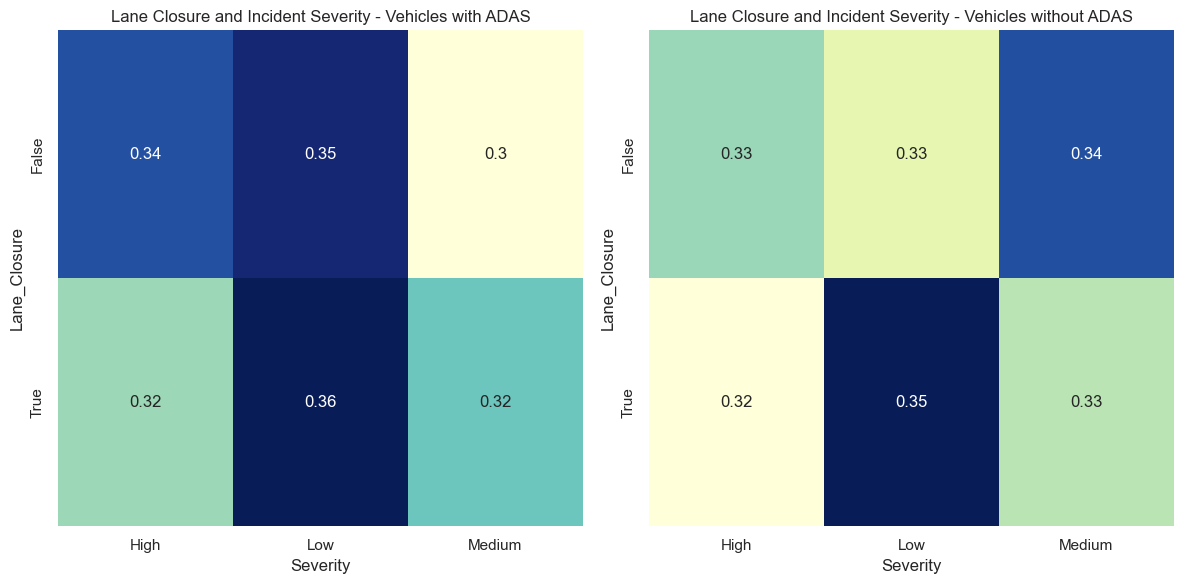

In [92]:
# Weather Condition and Accident Rate Analysis
weather_accident_rate_with_adas = merged_data[merged_data['ADAS_Active'] == 1].groupby('Weather_Condition')['Accident_Count'].mean()
weather_accident_rate_without_adas = merged_data[merged_data['ADAS_Active'] == 0].groupby('Weather_Condition')['Accident_Count'].mean()

# Set seaborn style
sns.set(style="whitegrid")

# Plot Lane Closure and Incident Severity
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(lane_closure_severity_with_adas, annot=True, cmap="YlGnBu", cbar=False)
plt.title("Lane Closure and Incident Severity - Vehicles with ADAS")

plt.subplot(1, 2, 2)
sns.heatmap(lane_closure_severity_without_adas, annot=True, cmap="YlGnBu", cbar=False)
plt.title("Lane Closure and Incident Severity - Vehicles without ADAS")

plt.tight_layout()
plt.show()



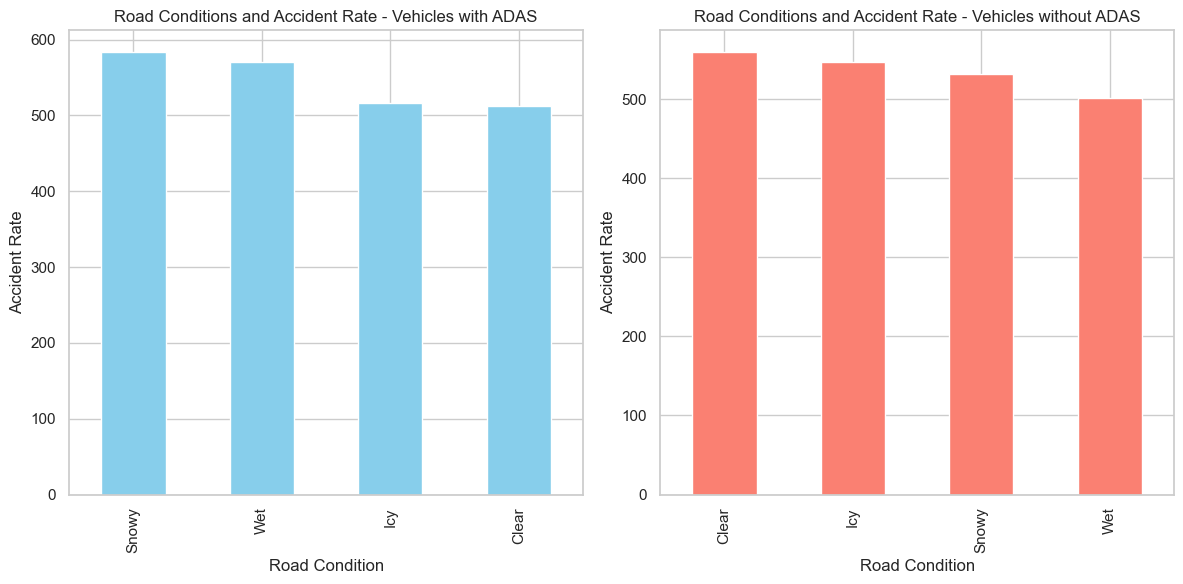

In [93]:
# Plot Road Conditions and Accident Rate
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
road_condition_counts_with_adas.plot(kind='bar', color='skyblue')
plt.title("Road Conditions and Accident Rate - Vehicles with ADAS")
plt.xlabel("Road Condition")
plt.ylabel("Accident Rate")

plt.subplot(1, 2, 2)
road_condition_counts_without_adas.plot(kind='bar', color='salmon')
plt.title("Road Conditions and Accident Rate - Vehicles without ADAS")
plt.xlabel("Road Condition")
plt.ylabel("Accident Rate")

plt.tight_layout()
plt.show()



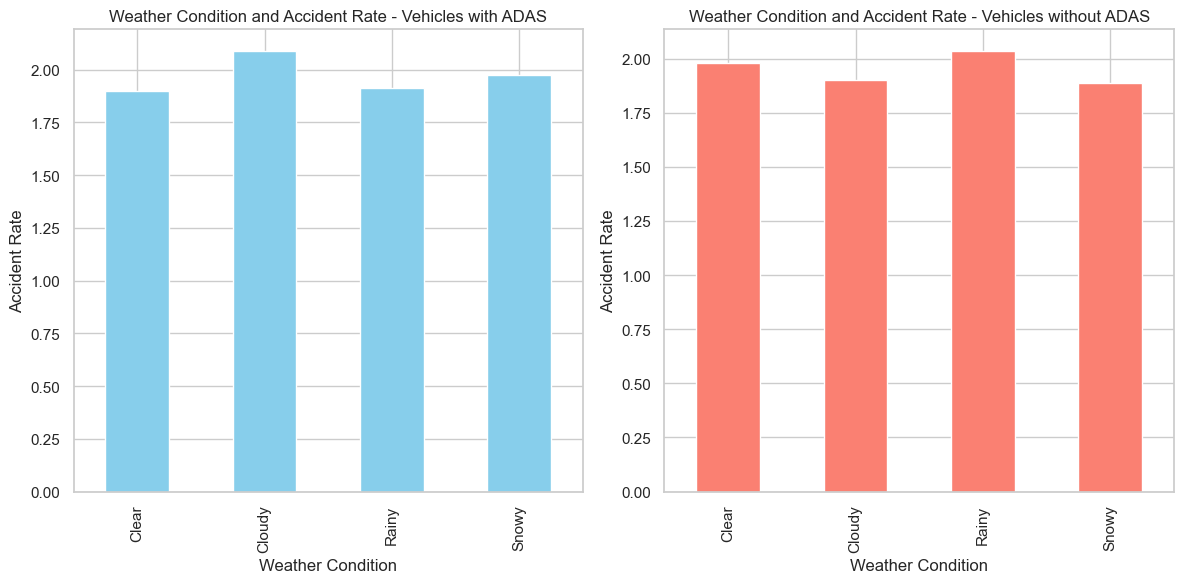

In [94]:
# Weather Condition and Accident Rate Analysis
weather_accident_rate_with_adas = merged_data[merged_data['ADAS_Active'] == 1].groupby('Weather_Condition')['Accident_Count'].mean()
weather_accident_rate_without_adas = merged_data[merged_data['ADAS_Active'] == 0].groupby('Weather_Condition')['Accident_Count'].mean()

# Plot Weather Condition and Accident Rate
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
weather_accident_rate_with_adas.plot(kind='bar', color='skyblue')
plt.title("Weather Condition and Accident Rate - Vehicles with ADAS")
plt.xlabel("Weather Condition")
plt.ylabel("Accident Rate")

plt.subplot(1, 2, 2)
weather_accident_rate_without_adas.plot(kind='bar', color='salmon')
plt.title("Weather Condition and Accident Rate - Vehicles without ADAS")
plt.xlabel("Weather Condition")
plt.ylabel("Accident Rate")

plt.tight_layout()
plt.show()



In [95]:
# Correlation between Sensors and Traffic Speed
sensor_speed_correlation = merged_data[['Lidar_Distance', 'Camera_Confidence', 'Radar_Distance', 'Traffic_Speed']].corr()
print("Correlation between Sensors and Traffic Speed:")
print(sensor_speed_correlation)



Correlation between Sensors and Traffic Speed:
                   Lidar_Distance  Camera_Confidence  Radar_Distance  \
Lidar_Distance           1.000000           0.002330        0.001789   
Camera_Confidence        0.002330           1.000000       -0.011269   
Radar_Distance           0.001789          -0.011269        1.000000   
Traffic_Speed           -0.001488          -0.009986        0.001308   

                   Traffic_Speed  
Lidar_Distance         -0.001488  
Camera_Confidence      -0.009986  
Radar_Distance          0.001308  
Traffic_Speed           1.000000  


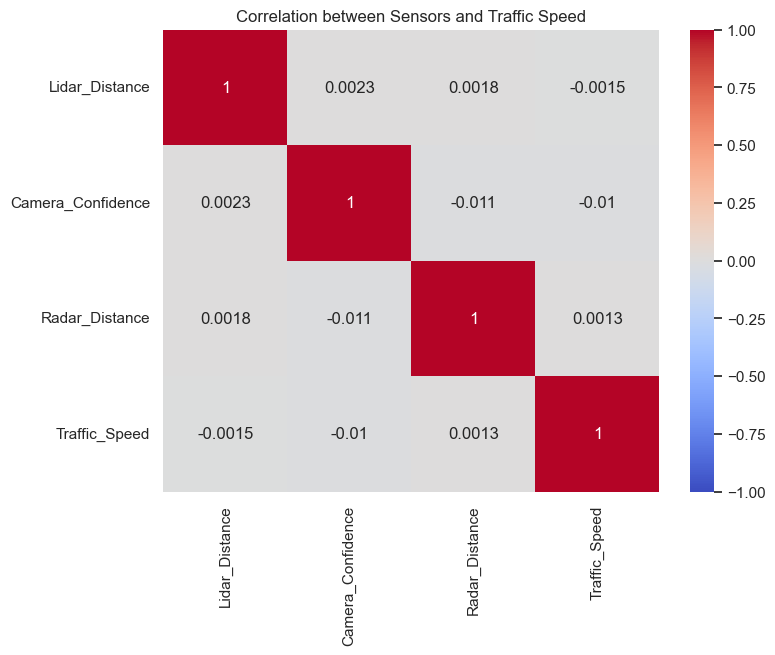

In [97]:
# Plot Correlation between Sensors and Traffic Speed
plt.figure(figsize=(8, 6))

sns.heatmap(sensor_speed_correlation, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation between Sensors and Traffic Speed")
plt.show()



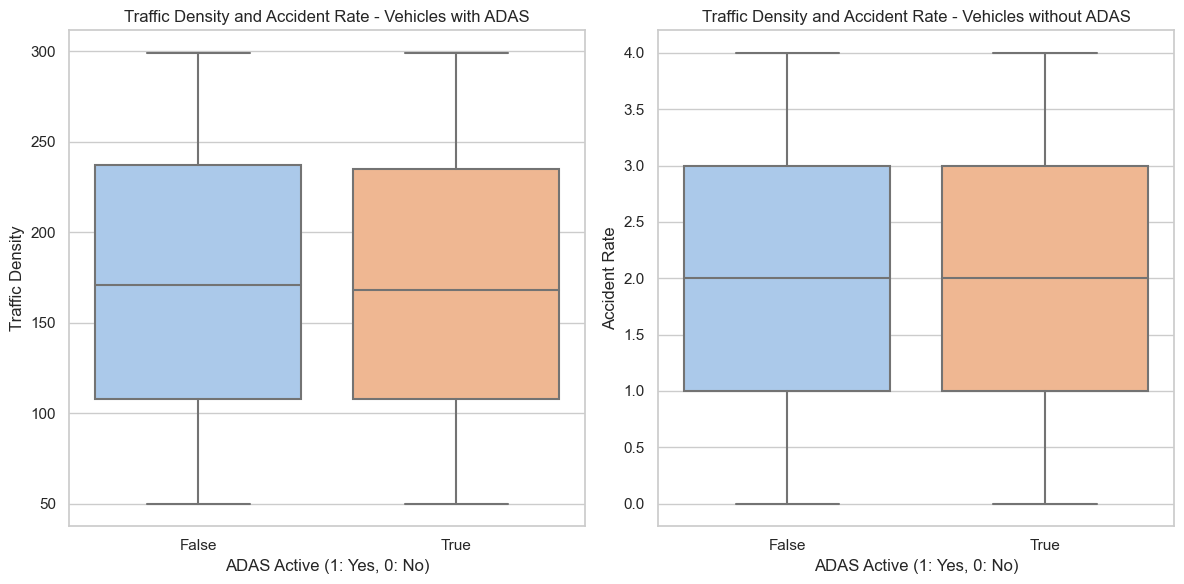

In [96]:
# Additional Analysis - Traffic Density and Accident Rate
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='ADAS_Active', y='Traffic_Density', data=merged_data, palette='pastel')
plt.title("Traffic Density and Accident Rate - Vehicles with ADAS")
plt.xlabel("ADAS Active (1: Yes, 0: No)")
plt.ylabel("Traffic Density")

plt.subplot(1, 2, 2)
sns.boxplot(x='ADAS_Active', y='Accident_Count', data=merged_data, palette='pastel')
plt.title("Traffic Density and Accident Rate - Vehicles without ADAS")
plt.xlabel("ADAS Active (1: Yes, 0: No)")
plt.ylabel("Accident Rate")

plt.tight_layout()
plt.show()



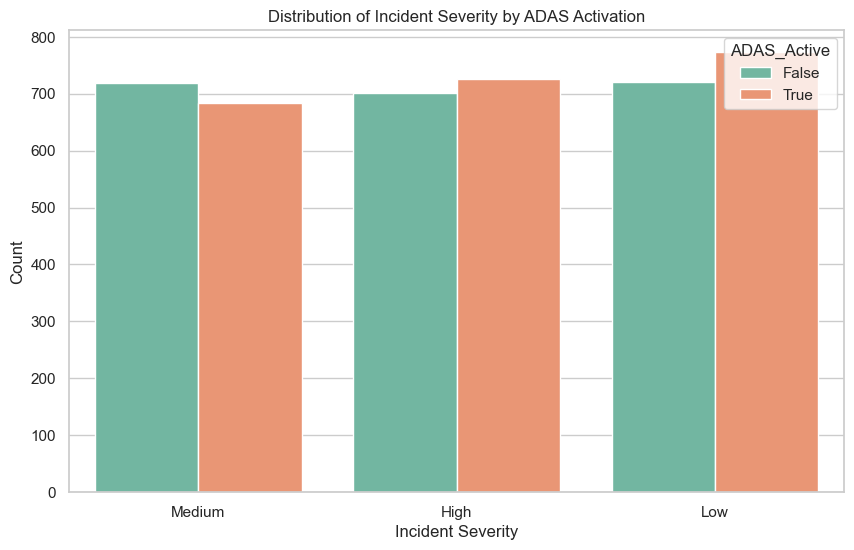

In [98]:
# Distribution of Incident Severity by ADAS Activation
plt.figure(figsize=(10, 6))

sns.countplot(x='Severity', hue='ADAS_Active', data=merged_data, palette='Set2')
plt.title("Distribution of Incident Severity by ADAS Activation")
plt.xlabel("Incident Severity")
plt.ylabel("Count")

plt.show()



Accident rate for vehicles with Lane_Assist_Active: 1.9591165413533835
Average traffic speed for vehicles with Lane_Assist_Active: 54.669172932330824


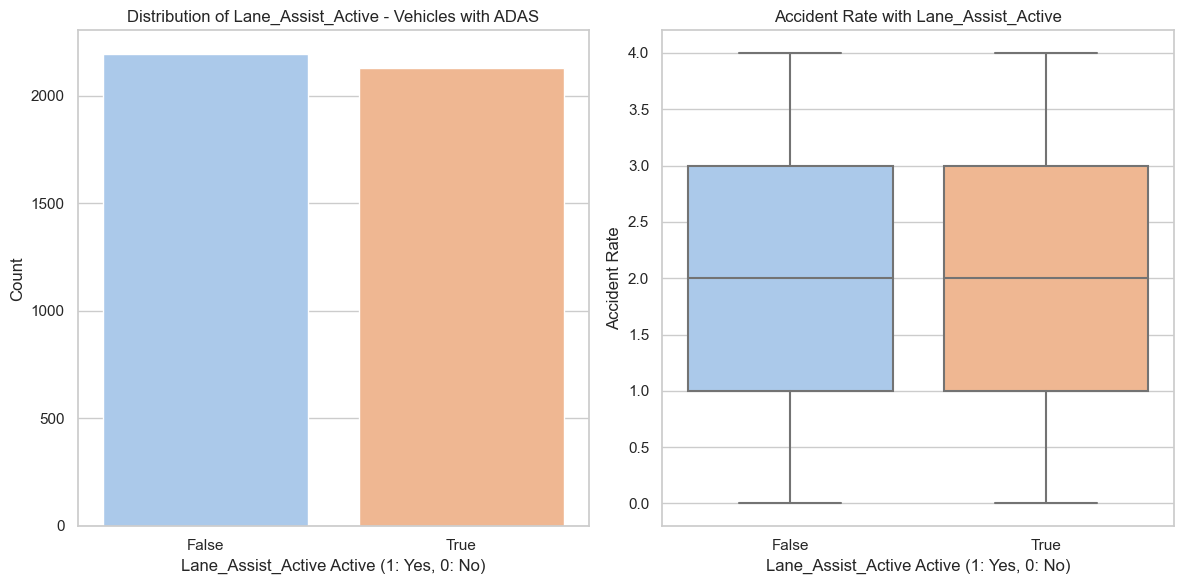

Accident rate for vehicles with Collision_Warning_Active: 1.9597285067873302
Average traffic speed for vehicles with Collision_Warning_Active: 55.09638009049774


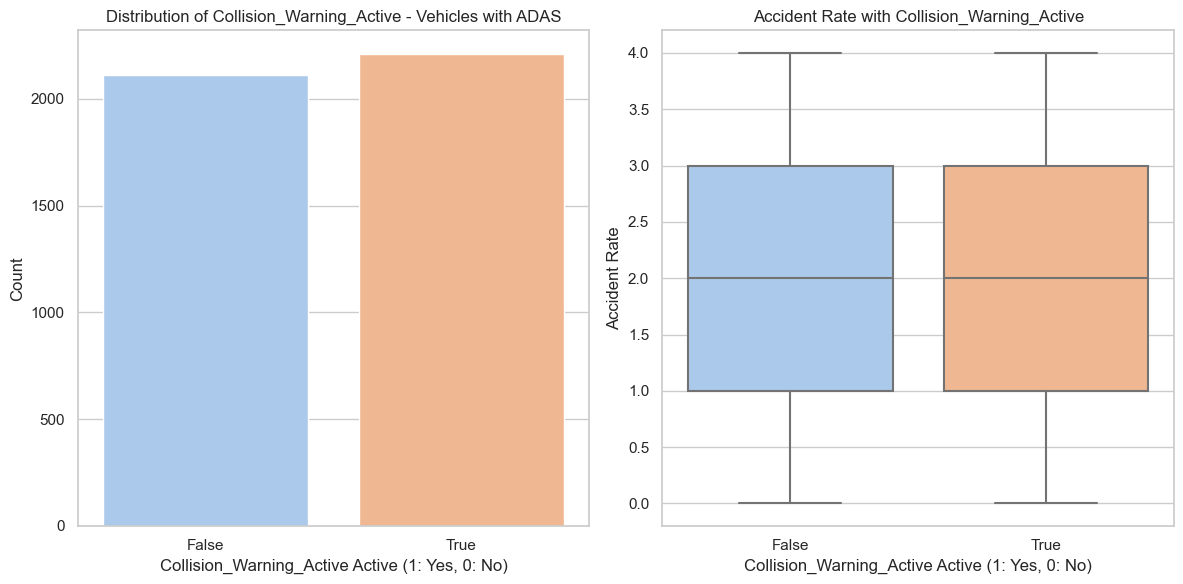

Accident rate for vehicles with Emergency_Braking_Active: 1.9757142857142858
Average traffic speed for vehicles with Emergency_Braking_Active: 54.918571428571425


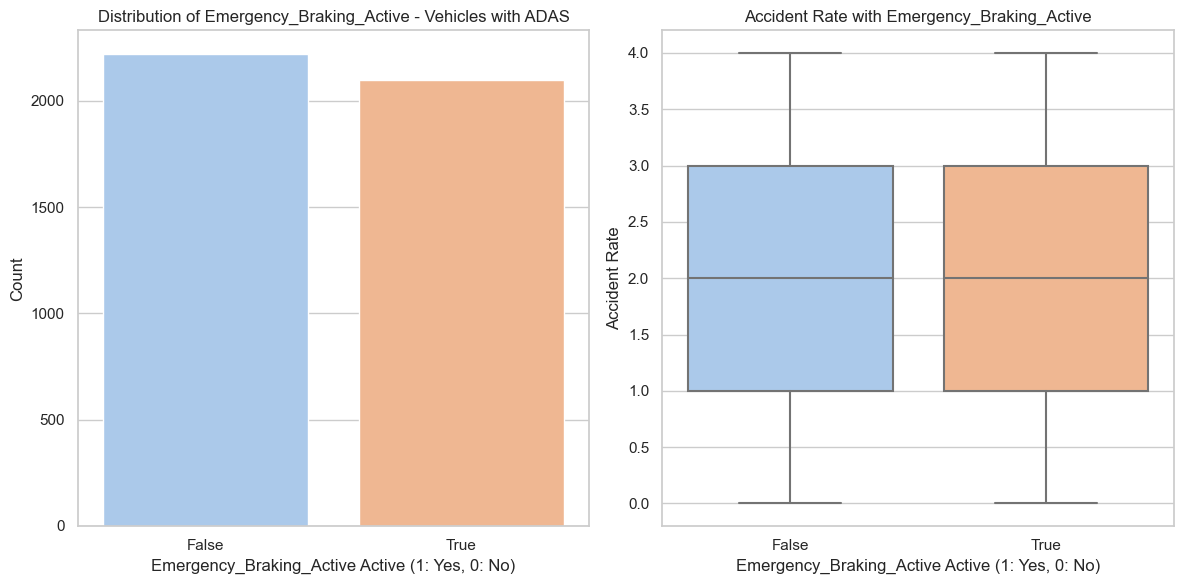

Accident rate for vehicles with Adaptive_Cruise_Control_Active: 1.9879796578825706
Average traffic speed for vehicles with Adaptive_Cruise_Control_Active: 54.88534442903375


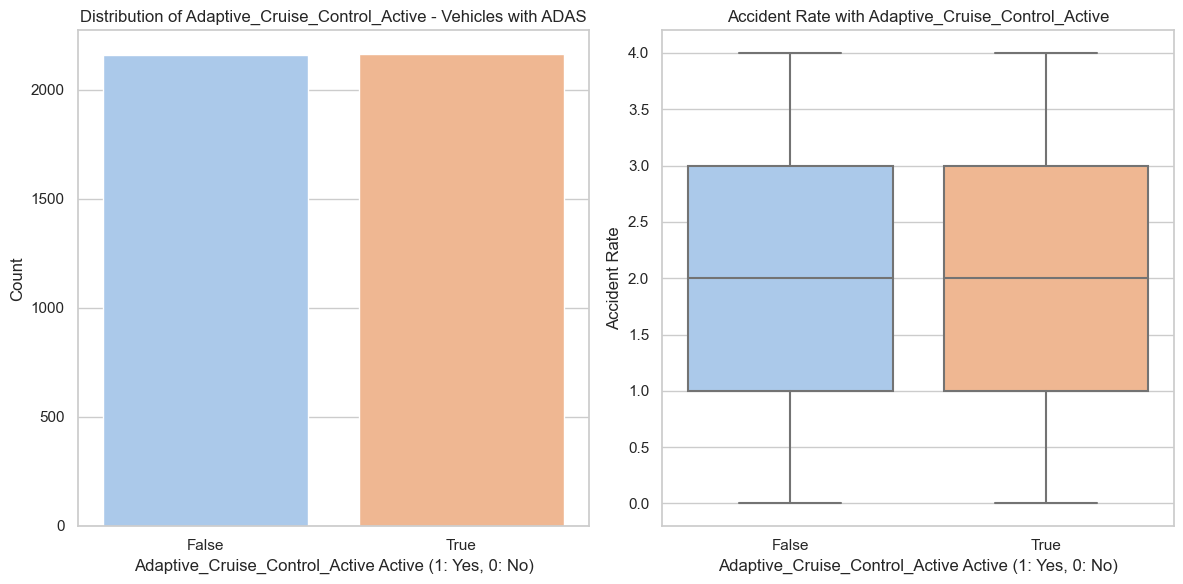

Accident rate for vehicles with Traffic_Sign_Recognition_Active: 1.9727985246657447
Average traffic speed for vehicles with Traffic_Sign_Recognition_Active: 54.69017980636238


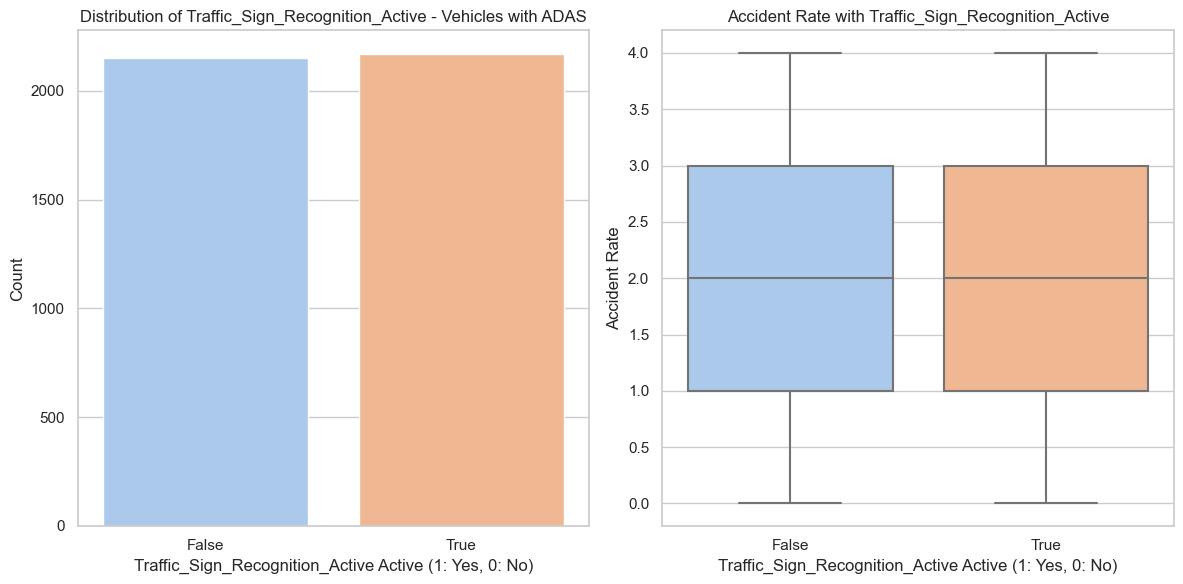

Accident rate for vehicles with Blind_Spot_Monitoring_Active: 1.9576923076923076
Average traffic speed for vehicles with Blind_Spot_Monitoring_Active: 54.39086538461538


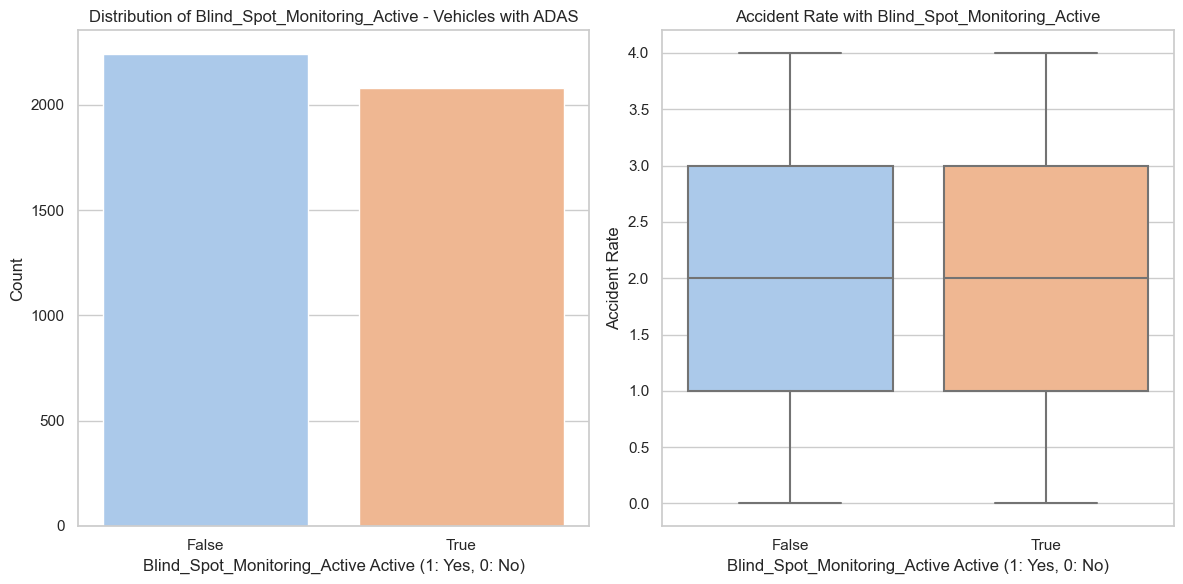

Accident rate for vehicles with Park_Assist_Active: 1.9425339366515837
Average traffic speed for vehicles with Park_Assist_Active: 54.62081447963801


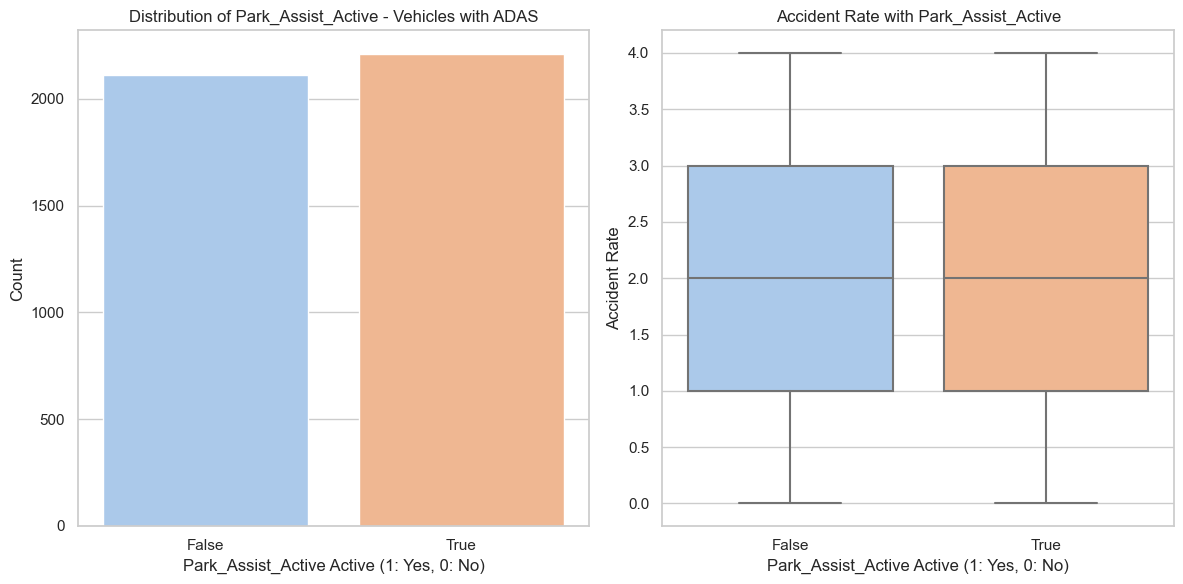

Accident rate for vehicles with Driver_Monitoring_Active: 1.9175495163519116
Average traffic speed for vehicles with Driver_Monitoring_Active: 54.647627821280516


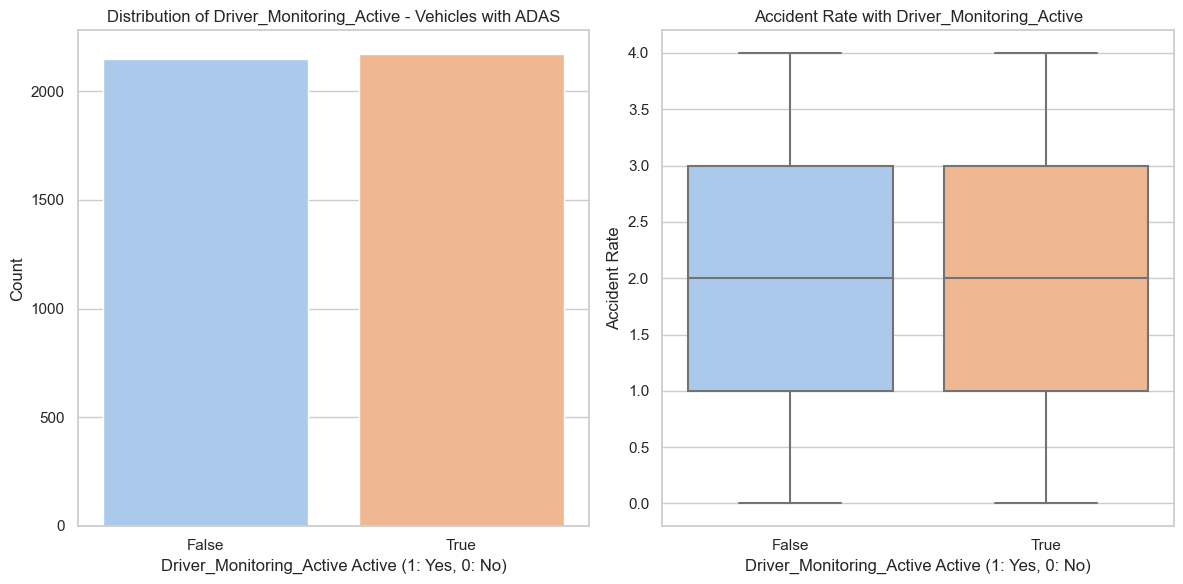

Accident rate for vehicles with Fog_Lights_Active: 1.975347377857463
Average traffic speed for vehicles with Fog_Lights_Active: 54.55311519497983


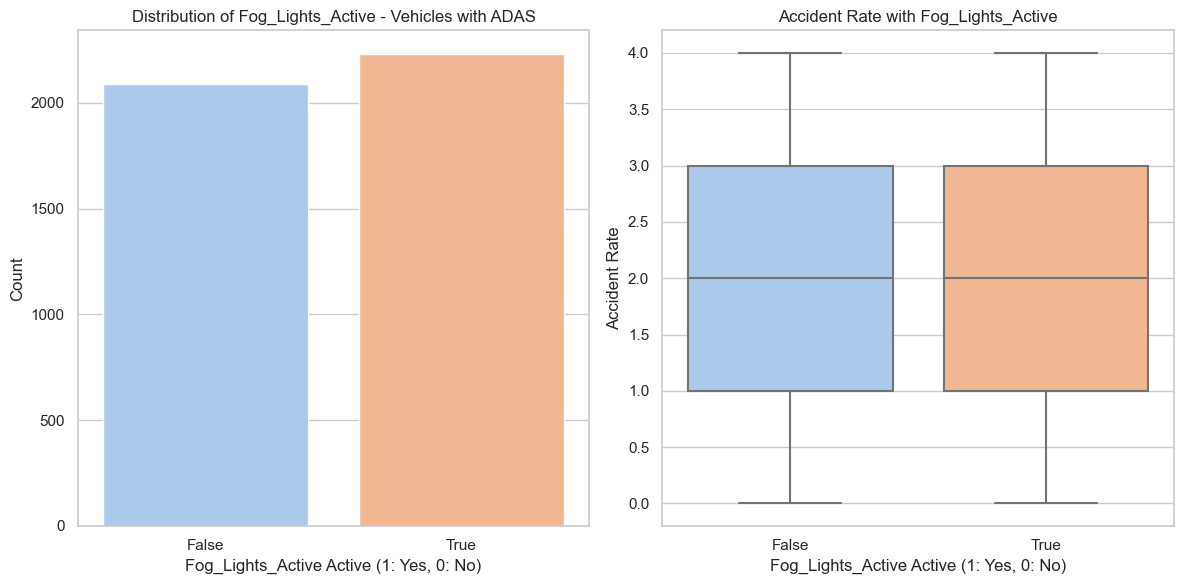

In [99]:
# Analyze the performance of individual ADAS features
adas_features = ['Lane_Assist_Active', 'Collision_Warning_Active', 'Emergency_Braking_Active',
                  'Adaptive_Cruise_Control_Active', 'Traffic_Sign_Recognition_Active',
                  'Blind_Spot_Monitoring_Active', 'Park_Assist_Active', 'Driver_Monitoring_Active', 'Fog_Lights_Active']

for feature in adas_features:
    feature_accident_rate = merged_data[merged_data[feature] == 1]['Accident_Count'].mean()
    feature_traffic_speed = merged_data[merged_data[feature] == 1]['Traffic_Speed'].mean()

    print(f"Accident rate for vehicles with {feature}: {feature_accident_rate}")
    print(f"Average traffic speed for vehicles with {feature}: {feature_traffic_speed}")

    # Plot the data
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    sns.countplot(x=feature, data=merged_data, palette='pastel')
    plt.title(f"Distribution of {feature} - Vehicles with ADAS")
    plt.xlabel(f"{feature} Active (1: Yes, 0: No)")
    plt.ylabel("Count")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=feature, y='Accident_Count', data=merged_data, palette='pastel')
    plt.title(f"Accident Rate with {feature}")
    plt.xlabel(f"{feature} Active (1: Yes, 0: No)")
    plt.ylabel("Accident Rate")

    plt.tight_layout()
    plt.show()



In [100]:
# Modelling

# Choose features and target variable
features = ['Lane_Assist_Active', 'Collision_Warning_Active', 'Emergency_Braking_Active',
            'Adaptive_Cruise_Control_Active', 'Traffic_Sign_Recognition_Active',
            'Blind_Spot_Monitoring_Active', 'Park_Assist_Active', 'Driver_Monitoring_Active', 'Fog_Lights_Active']
X = merged_data[features]
y = merged_data['Accident_Count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.1884393063583815
Classification Report:
              precision    recall  f1-score   support

           0       0.19      0.19      0.19       178
           1       0.16      0.18      0.17       170
           2       0.20      0.21      0.21       176
           3       0.16      0.16      0.16       167
           4       0.23      0.20      0.21       174

    accuracy                           0.19       865
   macro avg       0.19      0.19      0.19       865
weighted avg       0.19      0.19      0.19       865

Confusion Matrix:
[[34 47 31 39 27]
 [36 31 40 33 30]
 [33 39 37 38 29]
 [31 41 43 27 25]
 [43 32 31 34 34]]


In [101]:
# Create a binary target variable
merged_data['Accident_Occurrence'] = (merged_data['Accident_Count'] > 0).astype(int)

# Check the distribution of the new binary target variable
print(merged_data['Accident_Occurrence'].value_counts())


Accident_Occurrence
1    3430
0     891
Name: count, dtype: int64
